In [ ]:
#JSMJ



# # Lab Exp-4
8th September 2021
### 19csu003

# objective

•	To understand the importance of feature selection
•	To differentiate between different types of feature selection.
•	 Build a model using feature selection techniques.


### normal visualization of data  using seaborn lib

In [74]:
import numpy as np 
import pandas as pd 
#Read the Dataset
df=pd.read_csv('F:/Data 08.03.21/Desktop/ncu sem-5/AI_ML/csv/diabetes.csv')


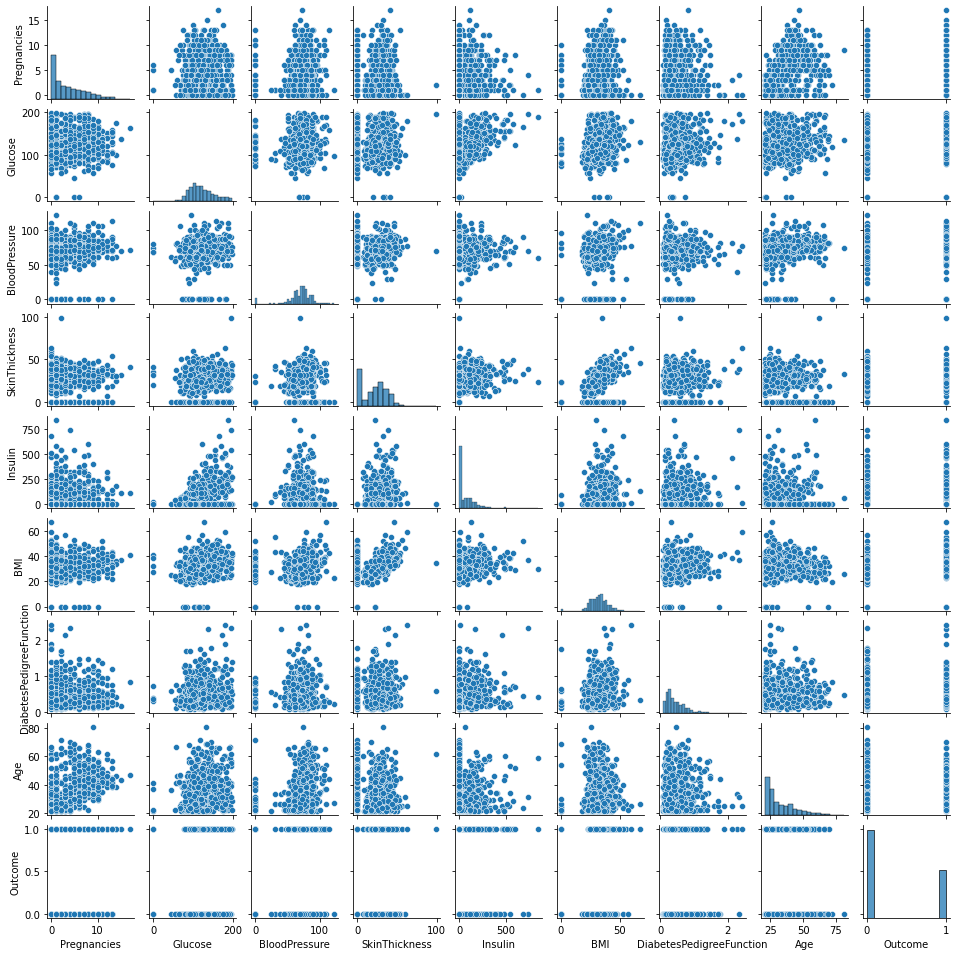

In [76]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df,height=1.5)

# pearsonr corealation

In [5]:
import numpy as np 
import pandas as pd 
#Read the Dataset
df=pd.read_csv('F:/Data 08.03.21/Desktop/ncu sem-5/AI_ML/csv/diabetes.csv')
#Top 5 rows
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,NaN,0.0,0.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,0.0,0.0,0.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,0.0,0.232,54,1


In [3]:
df.isnull().sum()

Pregnancies                  0
Glucose                      1
BloodPressure                6
SkinThickness               15
Insulin                     31
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

### pearsonr corelation with missing values and wothout normalization

In [6]:
df.corr(method ='pearson')    #corelation on basis of pearson
                            # corr() --find the correlation among the columns 
#     valu of all diagonal is one as coraltion amoung themselve will be one only

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126536,0.143585,-0.069506,-0.071738,0.011775,-0.033523,0.544341,0.221898
Glucose,0.126536,1.000000,0.145511,0.063810,0.343768,0.216595,0.133734,0.261402,0.467515
BloodPressure,0.143585,0.145511,1.000000,0.201203,0.085525,0.265183,0.032684,0.236799,0.074567
SkinThickness,-0.069506,0.063810,0.201203,1.000000,0.438241,0.393437,0.192300,-0.111071,0.083412
Insulin,-0.071738,0.343768,0.085525,0.438241,1.000000,0.197991,0.196745,-0.044479,0.135025
BMI,0.011775,0.216595,0.265183,0.393437,0.197991,1.000000,0.138733,0.032896,0.292076
DiabetesPedigreeFunction,-0.033523,0.133734,0.032684,0.192300,0.196745,0.138733,1.000000,0.033561,0.173844
Age,0.544341,0.261402,0.236799,-0.111071,-0.044479,0.032896,0.033561,1.000000,0.238356
Outcome,0.221898,0.467515,0.074567,0.083412,0.135025,0.292076,0.173844,0.238356,1.000000


### pearsonr corelation without missing values and with normalization

In [18]:
import numpy as np
import scipy.stats

x = df["SkinThickness"]
y = df["DiabetesPedigreeFunction"]
# scipy.stats.pearsonr(x, y)    
# tested with mising value but show error "must not contain inf or NaN value" 

# DEALING WITH MISSING VALUES
df=df.fillna(df.mean())
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,0.000000,33.6,0.627,50,1
1,1,85.0,66.000000,29.000000,0.000000,26.6,0.351,31,0
2,8,183.0,64.000000,0.000000,0.000000,23.3,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.1,2.288,33,1
5,5,116.0,69.447507,0.000000,0.000000,25.6,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.0,0.248,26,1
7,10,115.0,0.000000,0.000000,0.000000,35.3,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.5,0.158,53,1
9,8,125.0,96.000000,20.945551,83.156038,0.0,0.232,54,1


In [30]:
# Pearson of data without missing vlaue
# print(scipy.stats.pearsonr(x, y))   --method1


from scipy.stats import pearsonr     #---method2
corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr,_)

(0.19018650681614743, 1.0928762717748072e-07)
Pearsons correlation: 0.190 1.0928762717748072e-07


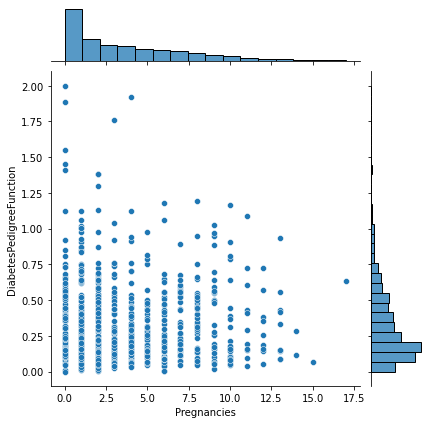

In [71]:
import seaborn as sns
%matplotlib inline

sns.jointplot(x=x,y=y,data=scaled_df,kind='scatter')

In [69]:
#noramlissation of dataframe
from sklearn import preprocessing

# normalized_df = preprocessing.normalize(df["Pregnancies"])
# print("Normalized Data = ", data["Pregnancies"])

scaler = preprocessing.MinMaxScaler(feature_range=(0, 2))                   #normalising only the columns of dataframes 
                                                                                #and within the scale of (0,2)
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

x1 = scaled_df["SkinThickness"]
y1 = scaled_df["DiabetesPedigreeFunction"]

scipy.stats.pearsonr(x1, y1)      #pearsonr coffien of normalised functions




(0.19018650681614743, 1.0928762717748072e-07)

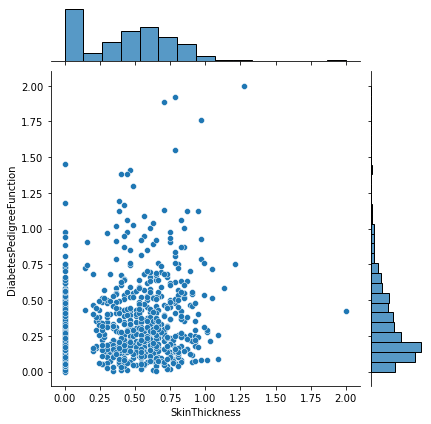

In [70]:
import seaborn as sns
%matplotlib inline

sns.jointplot(x=x1,y=y1,data=scaled_df,kind='scatter')

# #chisquare test

In [66]:

# The chi-square test tests the null hypothesis that the categorical
# data has the given frequencies.
from scipy.stats import chisquare

x=df["Pregnancies"]

chisquare(x)

Power_divergenceResult(statistic=2264.874703691161, pvalue=1.2544158029298326e-147)

In [34]:
from sklearn.feature_selection import chi2


In [65]:
# Chi-Square Test
# H0 (Null Hypothesis) = The 2 variables to be compared are independent.
# H1 (Alternate Hypothesis) = The 2 variables are dependent.

# Chi_df=pd.read_csv('F:/Data 08.03.21/Desktop/ncu sem-5/AI_ML/csv/diabetes.csv')

# Chi_df=Chi_df.fillna(Chi_df.mean())

# # Resultant DF WILL HAVE  same the column names and Index similar way as  df.corr()
# resul_df = pd.DataFrame(data=[(0 for i in range(len(Chi_df.columns))) for i in range(len(df.columns))], 
#                          columns=list(Chi_df.columns))                       #definng the df
# resul_df.set_index(pd.Index(list(Chi_df.columns)), inplace = True)

# # Finding p_value for all columns and make matrix
# for i in list(Chi_df.columns):
#     for j in list(Chi_df.columns):
#         if i != j:
#             chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(Chi_df[j]).reshape(-1, 1))
#             resul_df.loc[i,j] = p_val
# print(resul_df)




# !!!!!!!error!!!!!!

In [49]:

# Chi-Square Test
# H0 (Null Hypothesis) = The 2 variables to be compared are independent.
# H1 (Alternate Hypothesis) = The 2 variables are dependent

from scipy import stats

Chii_df=pd.read_csv('F:/Data 08.03.21/Desktop/ncu sem-5/AI_ML/csv/diabetes.csv')

# Chi_df=Chi_df.fillna(Chi_df.mean())

crosstab = pd.crosstab(Chii_df['Pregnancies'], Chii_df['Outcome'])         #as chi-square test can be best observed in categorical 
                                                                                    #data hence we took pregency and outocme parameter 
crosstab

BMI,0.0,18.2,18.4,19.1,19.3,19.4,19.5,19.6,19.9,20.0,...,49.6,49.7,50.0,52.3,52.9,53.2,55.0,57.3,59.4,67.1
Age,,,,,,,,,,,,,,,,,,,,,
21,3,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,2,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
24,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
26,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
27,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:

# Chi-Square Test
# H0 (Null Hypothesis) = The 2 variables to be compared are independent.
# H1 (Alternate Hypothesis) = The 2 variables are dependent

from scipy import stats

Chii_df=pd.read_csv('F:/Data 08.03.21/Desktop/ncu sem-5/AI_ML/csv/diabetes.csv')

# Chi_df=Chi_df.fillna(Chi_df.mean())

crosstab = pd.crosstab(Chii_df['Pregnancies'], Chii_df['Outcome'])         #as chi-square test can be best observed in categorical 
                                                                                    #data hence we took pregency and outocme parameter 
crosstab

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


In [56]:
stats.chi2_contingency(crosstab)

(64.59480868723006,
 8.648349123362548e-08,
 16,
 array([[72.265625  , 38.734375  ],
        [87.890625  , 47.109375  ],
        [67.05729167, 35.94270833],
        [48.828125  , 26.171875  ],
        [44.27083333, 23.72916667],
        [37.109375  , 19.890625  ],
        [32.55208333, 17.44791667],
        [29.296875  , 15.703125  ],
        [24.73958333, 13.26041667],
        [18.22916667,  9.77083333],
        [15.625     ,  8.375     ],
        [ 7.16145833,  3.83854167],
        [ 5.859375  ,  3.140625  ],
        [ 6.51041667,  3.48958333],
        [ 1.30208333,  0.69791667],
        [ 0.65104167,  0.34895833],
        [ 0.65104167,  0.34895833]]))

In [57]:
# There is a pd.get_dummies() method which creates dummy variables where each new variable is only one category of the original variable and is equal to “1” if they belong in that category and “0” if they do not. We will assign the dummy variables to a new Python data frame.

dummies = pd.get_dummies(df["Pregnancies"])
# dummies.drop([25], axis= 1, inplace= True)
dummies.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], df['current_mental_disorder'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

In [64]:
print(df.groupby("Pregnancies").count()["Outcome"])

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: Outcome, dtype: int64


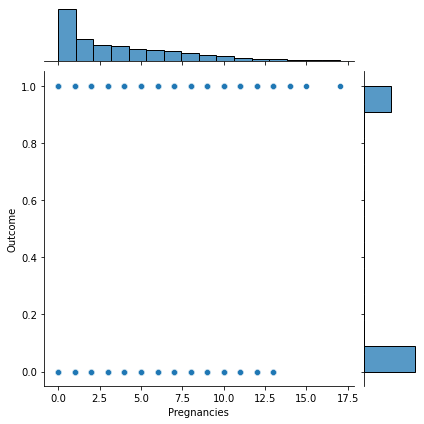

In [72]:
import seaborn as sns
%matplotlib inline

sns.jointplot(x="Pregnancies",y="Outcome",data=df,kind='scatter')

In [ ]:
# REFERRED SITES

# https://www.journaldev.com/45109/normalize-data-in-python
# https://realpython.com/numpy-scipy-pandas-correlation-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/
